# Implementation of the Task Class

In [ ]:
class Task:
    """
    Represents a task with its details and current status.

    Attributes:
        id (int): Unique identifier for the task.
        description (str): A brief description of the task.
        duration (int): Duration of the task in minutes.
        dependencies (list): List of task IDs that must be completed before this task.
        scheduled_time (int, optional): The specific time (in minutes from the start of the day)
                                         when the task is scheduled to start. Default is None.
        status (str): Current status of the task. Possible values:
                      - 'N' (NOT_STARTED): The task has not been started.
                      - 'I' (IN_PRIORITY_QUEUE): The task is in the priority queue.
                      - 'C' (COMPLETED): The task has been completed.
                      - 'D' (DELAYED): The task has been delayed.
        priority_score (int): A score representing the urgency or importance of the task.
                              Higher values indicate higher priority.
    """

    # Status constants for clarity and consistency
    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'

    def __init__(self, id, description, duration, dependencies, scheduled_time=None, status='N', priority_score=0):
        """
        Initializes a Task instance.

        Args:
            id (int): Unique identifier for the task.
            description (str): A brief description of the task.
            duration (int): Duration of the task in minutes.
            dependencies (list): List of task IDs that must be completed before this task.
            scheduled_time (int, optional): The specific time (in minutes from the start of the day)
                                             when the task is scheduled to start. Default is None.
            status (str): Initial status of the task. Default is 'N' (NOT_STARTED).
            priority_score (int): Initial priority score of the task. Default is 0.
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.scheduled_time = scheduled_time
        self.status = status
        self.priority_score = priority_score

    def __str__(self):
        """
        Returns a human-readable string representation of the Task.

        Returns:
            str: A string describing the task, including its ID, description,
                 duration, status, and priority score.
        """
        return (
            f"Task {self.id}: {self.description}\n"
            f"\tDuration: {self.duration} minutes\n"
            f"\tStatus: {self.status}\n"
            f"\tPriority Score = {self.priority_score}\n"
        )

    def compute_priority(self, current_time):
        """
        Computes and updates the task's priority score based on its attributes and the current time.

        Priority is calculated using the following factors:
        - Scheduled Time: Tasks closer to their scheduled time have higher priority.
        - Dependencies: Tasks with many dependencies have slightly reduced priority.
        - Duration: Shorter tasks may be prioritized for scheduling efficiency.

        Args:
            current_time (int): The current time (in minutes from the start of the day).
        """
        # Determine time priority based on the scheduled time of the task
        time_priority = 0 # Default
        if self.scheduled_time is not None:  # Check if the task has a predefined scheduled time
            if self.scheduled_time == current_time:
                time_priority = 100  # Assign maximum priority if the task is scheduled for the current time
            elif self.scheduled_time < current_time:
                time_priority = 0  # Task loses priority if its scheduled time has already passed
            else:
                # Increase priority as the task's scheduled time approaches the current time
                time_priority = (self.scheduled_time - current_time) * 10

        # Penalize tasks with many dependencies
        dependency_score = len(self.dependencies)

        # Total priority score calculation
        total_priority = (
            time_priority -  # Directly use time_priority, which can be positive
            dependency_score + # Dependence score contributes negatively to the utility
            abs(100 - self.duration)  # Longer tasks have lower scores
        )

        self.priority_score = total_priority

    def __lt__(self, other):
        """
        Compares tasks for sorting, based on their priority score.

        Args:
            other (Task): Another Task instance to compare with.

        Returns:
            bool: True if this task has a lower priority score than the other task.
        """
        return self.priority_score < other.priority_score

    def to_dict(self):
        """
        Converts the Task instance into a dictionary representation.

        Returns:
            dict: A dictionary containing the task's key attributes:
                  - id (int): Task ID.
                  - description (str): Task description.
                  - duration (int): Task duration in minutes.
                  - dependency (list): List of task dependencies.
        """
        return {
            "id": self.id,
            "description": self.description,
            "duration": self.duration,
            "dependencies": self.dependencies,
        }

# Task Table

In [ ]:
# Text input for 11 tasks:
Write grocery checklist, 50, 0
Do groceries at PX Mart, 50, Write grocery checklist
Charge Computer before class, 50, 0
Do Pre-Class Work for CS110, 100, Charge Computer before class
Vacuum the floor, 20, 0
Withdraw cash from 7-11 ATM, 15, 0
CS110 Class, 90, Do Pre-Class Work for CS110
Take NTU id card from the room, 5, 0
Go to the NTU library through YouBike, 20, Take NTU id card
Take the MRT train to the City Science Lab @ Taipei from MIT, 40, Take NTU id card
Bike back to Halfway Cafe in the Daan District to study until late, 30, Take NTU id card

In [ ]:
import pandas as pd
import numpy as np

def create_table():
    """
    Creates a table of tasks based on user input and stores them in a Pandas DataFrame.

    The user is prompted to enter the number of tasks and details for each task, including:
    description, duration (in minutes), and dependencies. The dependencies should be
    specified as task descriptions, with '0' indicating no dependencies.
    """

    # Prompt user for the number of tasks to add
    n_tasks = int(input("How many tasks will you add to the table? "))

    id = 0
    task_list = []
    task_df = pd.DataFrame(columns=['id', 'description', 'duration', 'dependencies'])

    # Loop to collect task details from user input
    for i in range(n_tasks):
        description, duration, dependency = input(
            "Type in comma separated values: description, duration (in minutes), "
            "and the name of the task which needs to be completed before that. If there are no dependencies, type 0: "
        ).split(', ')
        print(description, duration, dependency)

        # Create a new Task instance with provided details
        new_task = Task(
            id=id,
            description= description.strip(),
            duration= int(duration.strip()),
            dependencies= description.strip() if dependency != '0' else 'No Dependency'  # Convert dependency to list or empty if '0'
        )

        # Convert the new task to a dictionary format for DataFrame creation
        new_row = new_task.to_dict()

        # Append new row to existing DataFrame
        task_df = pd.concat([task_df, pd.DataFrame([new_row])], ignore_index=True)

        task_list.append(new_task)  # Add the new Task instance to the list

        id += 1  # Increment task ID for next task

    return task_df  # Print final DataFrame containing all tasks

# Call the function to execute it
create_table()

How many tasks will you add to the table? 11
Type in comma separated values: description, duration (in minutes), and the name of the task which needs to be completed before that. If there are no dependencies, type 0: Write grocery checklist, 50, 0
Write grocery checklist 50 0
Type in comma separated values: description, duration (in minutes), and the name of the task which needs to be completed before that. If there are no dependencies, type 0: Do groceries at PX Mart, 50, Write grocery checklist
Do groceries at PX Mart 50 Write grocery checklist
Type in comma separated values: description, duration (in minutes), and the name of the task which needs to be completed before that. If there are no dependencies, type 0: Charge Computer before class, 50, 0
Charge Computer before class 50 0
Type in comma separated values: description, duration (in minutes), and the name of the task which needs to be completed before that. If there are no dependencies, type 0: Do Pre-Class Work for CS110, 100,

,id,description,duration,dependencies
0,0,Write grocery checklist,50,No Dependency
1,1,Do groceries at PX Mart,50,Do groceries at PX Mart
2,2,Charge Computer before class,50,No Dependency
3,3,Do Pre-Class Work for CS110,100,Do Pre-Class Work for CS110
4,4,Vacuum the floor,20,No Dependency
5,5,Withdraw cash from 7-11 ATM,15,No Dependency
6,6,CS110 Class,90,CS110 Class
7,7,Take NTU id card from the room,5,No Dependency
8,8,Go to the NTU library through YouBike,20,Go to the NTU library through YouBike
9,9,Take the MRT train to the City Science Lab @ T...,40,Take the MRT train to the City Science Lab @ T...


# Implementation of the MaxHeap

Most of the code was extracted from Session Session 13 - [7.2] Heaps and priority queues (Levay, 2024)

In [ ]:
class MaxHeapq:
    """
    A class that implements properties and methods
    that support a max priority queue data structure.

    Attributes
    ----------
    heap : list
        A Python list where key values in the max heap are stored.
    heap_size : int
        An integer counter of the number of keys present in the max heap.
    """

    def __init__(self):
        """
        Initializes an empty MaxHeapq instance.

        Parameters
        ----------
        None
        """
        self.heap = []
        self.heap_size = 0

    def is_max_heap(self):
        """
        Checks if the current list satisfies the max heap property.

        Returns
        -------
        bool
            True if the list is a max heap, False otherwise.
        """
        a = self.heap
        n = self.heap_size

        # Check each node to ensure it is greater than its children
        for i in range(n):
            left_child = self.left(i)
            right_child = self.right(i)

            # Check if left child exists and is greater than parent
            if left_child < n and a[i] < a[left_child]:
                return False

            # Check if right child exists and is greater than parent
            if right_child < n and a[i] < a[right_child]:
                return False
        return True


    def left(self, i):
        """
        Takes the index of the parent node and returns the index of the left child node.

        Parameters
        ----------
        i : int
            Index of the parent node.

        Returns
        -------
        int
            Index of the left child node.
        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node and returns the index of the right child node.

        Parameters
        ----------
        i : int
            Index of the parent node.

        Returns
        -------
        int
            Index of the right child node.
        """
        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node and returns the index of the parent node.

        Parameters
        ----------
        i : int
            Index of the child node.

        Returns
        -------
        int
            Index of the parent node.
        """
        return (i - 1) // 2

    def heappush(self, key):
        """
        Inserts a key into the priority queue.

        Parameters
        ----------
        key : int
            The key value to be inserted.

        Returns
        -------
        None
            This method modifies the heap in place.
        """

        # Append a placeholder for new key and then increase its value to correct position
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size, key)
        self.heap_size += 1

    def increase_key(self, i, key):
        """
        Modifies the value of a key in a max priority queue with a higher value.

        Parameters
        ----------
        i : int
            The index of the key to be modified.
        key : int
            The new key value.

        Raises
        ------
        ValueError
            If new key is smaller than current key.

        Returns
        -------
        None
            This method modifies the heap in place.
        """

        if key.priority_score < self.heap[i]:
            raise ValueError('new key is smaller than the current key')

        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j

    def heapify(self, i):
        """
        Creates a max heap from the index given by ensuring that subtree rooted at index i satisfies max heap property.

        Parameters
        ----------
        i : int
            The index of the root node of the subtree to be heapified.

        Returns
        -------
        None
            This method modifies the heap in place.
        """
        l = self.left(i)
        r = self.right(i)
        largest = i

        # Check if left child exists and is greater than current largest
        if l < self.heap_size and self.heap[l] > self.heap[largest]:
            largest = l

        # Check if right child exists and is greater than current largest
        if r < self.heap_size and self.heap[r] > self.heap[largest]:
            largest = r

        # If largest is not current index, swap and continue heapifying
        if largest != i:
            self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
            self.heapify(largest)

    # Novel method
    def anypop(self, i):
        """
        Returns an arbitrary element from the max priority queue and removes it from it.

        Parameters
        ----------
        i : int
            The index of an element to pop from the heap.

        Raises
        ------
        ValueError
            If there are no keys in priority queue (heap underflow).

        Returns
        -------
        int
            The value extracted from the heap at index i.
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in priority queue.')

        any_value = self.heap[i]  # Store value to return later

        # Replace root with last element, pop last element, decrease size, then re-heapify
        self.heap[i] = self.heap[-1]
        self.heap.pop()
        self.heap_size -= 1

        # Re-heapify from index i to maintain max heap property
        self.heapify(i)

        return any_value

    def heappop(self):
        """
        Returns and removes the largest key in the max priority queue.

        Raises
        ------
        ValueError
            If there are no keys in priority queue (heap underflow).

        Returns
        -------
        int
            The maximum value extracted from the heap (the root).
        """

        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in priority queue.')

        max_value = self.heap[0]

        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size -= 1

        self.heapify(0)

        return max_value


## Test Case 1: Insert and Check Max Heap property

With all tasks independent and non-scheduled, priority is mainly computed by duration. Tasks with smaller duration are priorittized and should come first.

In [79]:
heap = MaxHeapq()

# fully independent tasks
simple_tasks = [
    Task(id=0, description='Write grocery checklist', duration=50, dependencies=[]),
    Task(id=1, description='Vacuum the floor', duration=20, dependencies=[]),
    Task(id=2, description='Withdraw cash from 7-11 ATM', duration=15, dependencies=[]),
    Task(id=3, description='Do groceries at PX Mart', duration=50, dependencies=[0]),
    Task(id=4, description='Charge Computer before class', duration=50, dependencies=[]),
    Task(id=5, description='Do Pre-Class Work for CS110', duration=100, dependencies=[4]),
]

# assume current time if 8am
current_time = 8*60

for task in simple_tasks:
  task.compute_priority(current_time)

# Insert all tasks into the heap
for task in simple_tasks:
    heap.heappush(task)

assert heap.is_max_heap(), "Heap does not maintain max-heap property after task insertions."
assert heap.heap[0].description == 'Withdraw cash from 7-11 ATM', "Heappop did not remove the correct task."

## Test Case 2: Remove the Maximum Element to test `heappop`

In [82]:
heap = MaxHeapq()

# fully independent tasks
simple_tasks = [
    Task(id=0, description='Vacuum the floor', duration=20, dependencies=[]),
    Task(id=1, description='Withdraw cash from 7-11 ATM', duration=15, dependencies=[]),
    Task(id=2, description='Do groceries at PX Mart', duration=50, dependencies=[]),
    Task(id=3, description='Charge Computer before class', duration=50, dependencies=[]),
    Task(id=4, description='Do Pre-Class Work for CS110', duration=100, dependencies=[]),
]

# assume current time is 8am
current_time = 8*60

for task in simple_tasks:
  task.compute_priority(current_time)

for task in simple_tasks:
    heap.heappush(task)

max_priority_task = heap.heappop()
print(max_priority_task)

# Verify the task with the highest priority (shortest duration) is removed
assert max_priority_task.description == 'Withdraw cash from 7-11 ATM', "Heappop did not remove the correct task."
assert heap.is_max_heap()

Task 1: Withdraw cash from 7-11 ATM
	Duration: 15 minutes
	Status: N
	Priority Score = 85



## Test Case 3: Remove Arbitrary Element to test `anypop()`

In [81]:
heap = MaxHeapq()

# fully independent tasks
simple_tasks = [
    Task(id=0, description='Vacuum the floor', duration=20, dependencies=[]),
    Task(id=1, description='Withdraw cash from 7-11 ATM', duration=15, dependencies=[]),
    Task(id=2, description='Do groceries at PX Mart', duration=50, dependencies=[]),
    Task(id=3, description='Charge Computer before class', duration=50, dependencies=[]),
    Task(id=4, description='Do Pre-Class Work for CS110', duration=100, dependencies=[]),
]

# assume current time is 8am
current_time = 8*60

for task in simple_tasks:
  task.compute_priority(current_time)

for task in simple_tasks:
    heap.heappush(task)

removed_task = heap.anypop(2)  # Arbitrarily remove task at index 2 (Withdraw cash from 7-11 ATM)

assert removed_task.description == 'Do groceries at PX Mart', "anypop did not remove the correct task."
assert heap.is_max_heap(), "Heap does not maintain max-heap property after anypop."

# Implementation of the Task Scheduler Class

In [92]:
class TaskScheduler:
    """
    A simple daily task scheduler using a priority queue.

    Attributes:
        tasks (list): List of tasks to be managed by the scheduler.
        priority_queue (MaxHeapq): Priority queue for managing task execution order.
    """

    NOT_STARTED = 'N'  # Task has not been started
    IN_PRIORITY_QUEUE = 'I'  # Task is in the priority queue
    COMPLETED = 'C'  # Task has been completed

    def __init__(self, tasks):
        """
        Initializes an instance of TaskScheduler.

        Args:
            tasks (list): List of Task instances to schedule.
        """
        self.tasks = tasks  # Store the list of tasks
        self.priority_queue = MaxHeapq()  # Initialize the priority queue
        self.executed_task_descriptions = []  # Stores descriptions of executed tasks

    def print_self(self):
        """Prints all tasks added to the scheduler with their details."""
        print("Tasks added to the simple scheduler:")
        print("--------------------------------------")

        for t in self.tasks:
            print(f"➡️ '{t.description}', duration = {t.duration} mins.")
            if len(t.dependencies) > 0:
                print(f"\t ⚠️ This task depends on others!")
                print(f"These are the dependencies: {t.dependencies}")

    def print_priority_queue(self):
        """Prints the current state of the priority queue."""
        print('This is my priority queue: ')

        for order, task in enumerate(self.priority_queue.heap):
            print(f'{order}) {task}')

    def remove_dependency(self, id):
        """
        Removes a specified task ID from the dependencies of other tasks.

        Args:
            id (int): The ID of the task whose dependencies should be removed.
        """
        for t in self.tasks:
            if t.id != id and id in t.dependencies:
                t.dependencies.remove(id)

    def get_tasks_ready(self, current_time):
        """
        Updates the status and computes priorities for tasks that are ready to execute.

        Args:
            current_time (int): The current time used to check readiness.
        """

        for task in self.tasks:
            # If the task has no dependencies and is not yet in the queue
            if task.status == self.NOT_STARTED and not task.dependencies:
                # Update status of the task
                task.status = self.IN_PRIORITY_QUEUE
                task.compute_priority(current_time)  # Compute priority based on current time
                # Push task into the priority queue
                self.priority_queue.heappush(task)

    def check_unscheduled_tasks(self):
        """Checks if there are any unscheduled tasks remaining."""

        for task in self.tasks:
            if task.status == self.NOT_STARTED:  # If any task is not started, return True
                return True

        return False  # No unscheduled tasks

    def format_time(self, time):
        """Formats time from minutes into hours and minutes string format."""

        return f"{time // 60}h{time % 60:02d}"

    def validate_heap(self):
        """Validates that the priority queue maintains its max-heap property."""
        assert self.priority_queue.is_max_heap(), "Heap property violated!"

    def run_task_scheduler(self, starting_time):
        """
        Executes the scheduler starting from a specified time.

        Args:
            starting_time (int): The initial time from which scheduling begins.
        """
        day_ended = False  # Flag to indicate if the day has ended
        current_time = starting_time  # Initialize current time
        print("Running a simple scheduler:\n")

        while self.check_unscheduled_tasks() or self.priority_queue.heap:
            self.get_tasks_ready(current_time)  # Prepare tasks ready to execute
            # NOTE: Make sure to comment the print values when running the quantitative experiment and avoid memory overflow
            #self.print_priority_queue()

            if self.priority_queue.heap_size > 0:  # If there are tasks in the queue
                current_task = self.priority_queue.heappop()  # Get highest priority task
                self.validate_heap()  # Validate heap property

                scheduled_time = current_task.scheduled_time

                if scheduled_time is not None and scheduled_time > current_time:
                    wait_until = scheduled_time

                    while current_time < wait_until:  # Wait until scheduled time
                        fill_in_executed = False

                        for current_index in range(self.priority_queue.heap_size):
                            peek_fill_in_task = self.priority_queue.heap[current_index]

                            if peek_fill_in_task.scheduled_time is None or peek_fill_in_task.scheduled_time < scheduled_time:
                                if current_time + peek_fill_in_task.duration <= wait_until:
                                    fill_in_task = self.priority_queue.anypop(current_index)
                                    self.validate_heap()

                                    # NOTE: Make sure to comment the print values when running the quantitative experiment and avoid memory overflow
                                    print(f"🚀 Fill-in task available! t={self.format_time(current_time)}: started '{fill_in_task.description}' for {fill_in_task.duration} mins...")
                                    current_time += fill_in_task.duration  # Update current time after executing fill-in task
                                    print(f"\t✅ t={self.format_time(current_time)}, task completed!\n")
                                    self.remove_dependency(fill_in_task.id)  # Remove completed dependencies
                                    fill_in_task.status = fill_in_task.COMPLETED  # Mark as completed
                                    self.executed_task_descriptions.append(fill_in_task.description)  # Log description
                                    fill_in_executed = True
                                    break

                        if not fill_in_executed:  # If no fill-in tasks were executed, wait longer
                            print(f"💤 t={self.format_time(current_time)}: No eligible fill-in tasks available, waiting...\n")
                            current_time += 1

                # NOTE: Make sure to comment the print values when running the quantitative experiment and avoid memory overflow
                print(f"🕰t={self.format_time(current_time)}: started '{current_task.description}' for {current_task.duration} mins...")
                current_time += current_task.duration  # Update time after executing main task
                print(f"\t✅ t={self.format_time(current_time)}, task completed!\n")
                self.remove_dependency(current_task.id)  # Remove completed dependencies
                current_task.status = current_task.COMPLETED  # Mark as completed
                self.executed_task_descriptions.append(current_task.description)  # Store description

                total_time_so_far = current_time - starting_time

        total_time = current_time - starting_time
        print(f"\n🏁 Completed all planned tasks in {total_time // 60}h{total_time % 60:02d}min!")

    def print_executed_task_descriptions(self):
        """
        Prints the final descriptions of executed tasks as a list of strings.
        """
        print("\nFinal descriptions of executed tasks:")
        print("-------------------------------------")
        for i, description in enumerate(self.executed_task_descriptions, start=1):
            print(f"{i}. {description}")

#Tests

## Simple Sample Schedule

In [87]:
simple_tasks = [
    Task(id=0, description='Write grocery checklist', duration=50, dependencies=[]),
    Task(id=1, description='Vacuum the floor', duration=20, dependencies=[]),
    Task(id=2, description='Withdraw cash from 7-11 ATM', duration=15, dependencies=[]),
    Task(id=3, description='Do groceries at PX Mart', duration=50, dependencies=[0]),
    Task(id=4, description='Charge Computer before class', duration=50, dependencies=[]),
    Task(id=5, description='Do Pre-Class Work for CS110', duration=100, dependencies=[4]),
]

In [88]:
simple_task_scheduler = TaskScheduler(simple_tasks)

simple_task_scheduler.print_self()

start_scheduler_at = 8*60
simple_task_scheduler.run_task_scheduler(start_scheduler_at)

Tasks added to the simple scheduler:
--------------------------------------
➡️ 'Write grocery checklist', duration = 50 mins.
➡️ 'Vacuum the floor', duration = 20 mins.
➡️ 'Withdraw cash from 7-11 ATM', duration = 15 mins.
➡️ 'Do groceries at PX Mart', duration = 50 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0]
➡️ 'Charge Computer before class', duration = 50 mins.
➡️ 'Do Pre-Class Work for CS110', duration = 100 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [4]
Running a simple scheduler:

This is my priority queue: 
0) Task 2: Withdraw cash from 7-11 ATM
	Duration: 15 minutes
	Status: I
	Priority Score = 85

1) Task 0: Write grocery checklist
	Duration: 50 minutes
	Status: I
	Priority Score = 50

2) Task 1: Vacuum the floor
	Duration: 20 minutes
	Status: I
	Priority Score = 80

3) Task 4: Charge Computer before class
	Duration: 50 minutes
	Status: I
	Priority Score = 50

🕰t=8h00: started 'Withdraw cash from 7-11 ATM' for 15 mins...
	✅ t

## Verifiying Heap Property

In [94]:
tasks = [
    Task(id=0, description='Get up at 8:00 AM',
         duration=30, dependencies=[]),
    Task(id=1, description='Walk to 7-11 and have breakfast',
         duration=20, dependencies=[0]),
    Task(id=2, description='Bike to the Main NTU Library',
         duration=12, dependencies=[0, 1]),
    Task(id=3, description='Do Pre-Class Work for CS111',
         duration=50, dependencies=[2]),
    Task(id=4, description='Formalize the Utility function definition for CS110 Assignment',
         duration=90, dependencies=[2]),
    Task(id=5, description='Prepare video scripts and whiteboards for CS110 Assignment',
         duration=80, dependencies=[2]),
    Task(id=6, description="Have lunch at JJ's Poke Bowl and bike back to the library",
         duration=75, dependencies=[2], scheduled_time=13*60),
    Task(id=7, description='CS111 Class',
         duration=90, dependencies=[3], scheduled_time=18*60),
    Task(id=8, description='Record CS110 Videos',
         duration=75, dependencies=[4, 5]),
    Task(id=9, description='Work on written parts of CS110 Assignment',
         duration=120, dependencies=[8]),
    Task(id=10, description='Bike back to 9Floor after the library closes at 22h',
         duration=12, dependencies=[6, 7, 8, 9], scheduled_time=22*60)
    ]

task_scheduler = TaskScheduler(tasks)

task_scheduler.print_self()

start_scheduler_at = 8*60
task_scheduler.run_task_scheduler(start_scheduler_at)

Tasks added to the simple scheduler:
--------------------------------------
➡️ 'Get up at 8:00 AM', duration = 30 mins.
➡️ 'Walk to 7-11 and have breakfast', duration = 20 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0]
➡️ 'Bike to the Main NTU Library', duration = 12 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0, 1]
➡️ 'Do Pre-Class Work for CS111', duration = 50 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Formalize the Utility function definition for CS110 Assignment', duration = 90 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Prepare video scripts and whiteboards for CS110 Assignment', duration = 80 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Have lunch at JJ's Poke Bowl and bike back to the library', duration = 75 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'CS111 Class', duration = 90 mins.
	 ⚠️ This task dep

## Switching order

In [ ]:
# Original order
tasks = [
    Task(id=0, description='Get up at 8:00 AM',
         duration=30, dependencies=[]),
    Task(id=1, description='Walk to 7-11 and have breakfast',
         duration=20, dependencies=[0]),
    Task(id=2, description='Bike to the Main NTU Library',
         duration=12, dependencies=[0, 1]),
    Task(id=3, description='Do Pre-Class Work for CS111',
         duration=50, dependencies=[2]),
    Task(id=4, description='Formalize the Utility function definition for CS110 Assignment',
         duration=90, dependencies=[2]),
    Task(id=5, description='Prepare video scripts and whiteboards for CS110 Assignment',
         duration=80, dependencies=[2]),
    Task(id=6, description="Have lunch at JJ's Poke Bowl and bike back to the library",
         duration=75, dependencies=[2], scheduled_time=13*60),
    Task(id=7, description='CS111 Class',
         duration=90, dependencies=[3], scheduled_time=18*60),
    Task(id=8, description='Record CS110 Videos',
         duration=75, dependencies=[4, 5]),
    Task(id=9, description='Work on written parts of CS110 Assignment',
         duration=120, dependencies=[8]),
    Task(id=10, description='Bike back to 9Floor after the library closes at 22h',
         duration=12, dependencies=[6, 7, 8, 9], scheduled_time=22*60)
    ]

task_scheduler = TaskScheduler(tasks)

# print the scheduler's input
task_scheduler.print_self()

start_scheduler_at = 8*60
task_scheduler.run_task_scheduler(start_scheduler_at)

expected_order = task_scheduler.executed_task_descriptions

# Different order 1
diff_order_1 = [
    Task(id=0, description='Bike back to 9Floor after the library closes at 22h',
         duration=12, dependencies=[7, 8, 9, 10]),
    Task(id=1, description='Get up at 8:00 AM',
         duration=30, dependencies=[]),
    Task(id=2, description='Walk to 7-11 and have breakfast',
         duration=20, dependencies=[1]),
    Task(id=3, description='Bike to the Main NTU Library',
         duration=12, dependencies=[1, 2]),
    Task(id=4, description='Do Pre-Class Work for CS111',
         duration=50, dependencies=[3]),
    Task(id=5, description='Formalize the Utility function definition for CS110 Assignment',
         duration=90, dependencies=[3]),
    Task(id=6, description='Prepare video scripts and whiteboards for CS110 Assignment',
         duration=80, dependencies=[3]),
    Task(id=7, description="Have lunch at JJ's Poke Bowl and bike back to the library",
         duration=75, dependencies=[3], scheduled_time=13*60),
    Task(id=8, description='CS111 Class',
         duration=90, dependencies=[4], scheduled_time=18*60),
    Task(id=9, description='Record CS110 Videos',
         duration=75, dependencies=[5, 6]),
    Task(id=10, description='Work on written parts of CS110 Assignment',
         duration=120, dependencies=[9])
]

task_scheduler_diff_order_1 = TaskScheduler(diff_order_1)

task_scheduler_diff_order_1.print_self()

start_scheduler_at = 8*60
task_scheduler_diff_order_1.run_task_scheduler(start_scheduler_at)

task_descriptions_diff_order_1 = task_scheduler_diff_order_1.executed_task_descriptions

assert task_descriptions_diff_order_1 == expected_order, f"Mismatch found: {task_descriptions_diff_order_1} != {expected_order}"

# Different order 2
diff_order_2 = [
    Task(id=0, description='Get up at 8:00 AM',
         duration=30, dependencies=[]),
    Task(id=1, description='Walk to 7-11 and have breakfast',
         duration=20, dependencies=[0]),
    Task(id=2, description='Bike to the Main NTU Library',
         duration=12, dependencies=[0, 1]),
    Task(id=3, description='Have lunch at JJ\'s Poke Bowl and bike back to the library',
         duration=75, dependencies=[2], scheduled_time=13*60),
    Task(id=4, description='Do Pre-Class Work for CS111',
         duration=50, dependencies=[2]),
    Task(id=5, description='Formalize the Utility function definition for CS110 Assignment',
         duration=90, dependencies=[2]),
    Task(id=6, description='Record CS110 Videos',
         duration=75, dependencies=[5, 10]),
    Task(id=7, description='CS111 Class',
         duration=90, dependencies=[4], scheduled_time=18*60),
    Task(id=8, description='Bike back to 9Floor after the library closes at 22h',
         duration=12, dependencies=[3, 6, 7, 9]),
    Task(id=9, description='Work on written parts of CS110 Assignment',
         duration=120, dependencies=[6]),
    Task(id=10, description='Prepare video scripts and whiteboards for CS110 Assignment',
         duration=80, dependencies=[2])
]

task_scheduler_diff_order_2 = TaskScheduler(diff_order_2)

task_scheduler_diff_order_2.print_self()

start_scheduler_at = 8*60
task_scheduler_diff_order_2.run_task_scheduler(start_scheduler_at)

task_descriptions_diff_order_2 = task_scheduler_diff_order_2.executed_task_descriptions

assert task_descriptions_diff_order_2 == expected_order, f"Mismatch found: {task_descriptions_diff_order_2} != {expected_order}"

Tasks added to the simple scheduler:
--------------------------------------
➡️ 'Get up at 8:00 AM', duration = 30 mins.
➡️ 'Walk to 7-11 and have breakfast', duration = 20 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0]
➡️ 'Bike to the Main NTU Library', duration = 12 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0, 1]
➡️ 'Do Pre-Class Work for CS111', duration = 50 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Formalize the Utility function definition for CS110 Assignment', duration = 90 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Prepare video scripts and whiteboards for CS110 Assignment', duration = 80 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Have lunch at JJ's Poke Bowl and bike back to the library', duration = 75 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'CS111 Class', duration = 90 mins.
	 ⚠️ This task dep

# My Performed Schedule

In [93]:
tasks = [
Task(id=0, description='Get up at 9:00 AM',
     duration=30, dependencies=[]),
Task(id=1, description='Get ready for the day (organize backpack)',
     duration=15, dependencies=[0]),
Task(id=2, description='Bike to the Main NTU Library',
     duration=15, dependencies=[0, 1]),
Task(id=3, description='Do Pre-Class Work for CS111',
     duration=75, dependencies=[2]),
Task(id=4, description='Formalize the utility function definition for CS110 Assignment',
     duration=60, dependencies=[2]),
Task(id=5, description='Prepare video scripts and whiteboards for CS110 Assignment',
     duration=75, dependencies=[2]),
Task(id=6, description='Bike and have lunch at JJs Poke Bowl',
     duration=75, dependencies=[2], scheduled_time=14*60),
Task(id=7, description='CS111 Class',
     duration=90, dependencies=[3, 6], scheduled_time=18*60),
Task(id=8, description='Fix bugs in the additional fill-task methods for CS110 Assignment',
     duration=90, dependencies=[5]),
Task(id=9, description='Work on LBA part of the upcoming CS111 Assignment',
     duration=60, dependencies=[3]),
Task(id=9, description='Bike back from JJs to NTU Library before CS111 class',
     duration=10, dependencies=[6]),
Task(id=10, description='Bike back to Res Hall after class finishes at 7:30pm',
     duration=12, dependencies=[6, 7, 8, 9], scheduled_time=1170) # 19.5*60 expressed as an integer
]

task_scheduler = TaskScheduler(tasks)

task_scheduler.print_self()

start_scheduler_at = 9*60
task_scheduler.run_task_scheduler(start_scheduler_at)
task_scheduler.print_executed_task_descriptions()

Tasks added to the simple scheduler:
--------------------------------------
➡️ 'Get up at 9:00 AM', duration = 30 mins.
➡️ 'Get ready for the day (organize backpack)', duration = 15 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0]
➡️ 'Bike to the Main NTU Library', duration = 15 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0, 1]
➡️ 'Do Pre-Class Work for CS111', duration = 75 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Formalize the utility function definition for CS110 Assignment', duration = 60 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Prepare video scripts and whiteboards for CS110 Assignment', duration = 75 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'Bike and have lunch at JJs Poke Bowl', duration = 75 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [2]
➡️ 'CS111 Class', duration = 90 mins.
	 ⚠️ This task depends on oth

# Efficiency Analysis

## Quantitative Analysis

**References**

> Geeks for Geeks: Log Log function in Python https://www.geeksforgeeks.org/matplotlib-pyplot-loglog-function-in-python/

> Statology: Scatterplot with regression line in Python https://www.statology.org/scatterplot-with-regression-line-python/



In [ ]:
import pandas as pd
import numpy as np
import random
import time

def generate_tasks(num_tasks):
    """
    Generates a list of randomly created tasks.

    Args:
        num_tasks (int): The number of tasks to generate.

    Returns:
        list: A list of Task instances with random durations and no dependencies.
    """
    tasks = []  # Initialize an empty list to hold the tasks

    # Loop to create the specified number of tasks
    for i in range(num_tasks):
        duration = random.randint(1, 60)  # Random duration between 1 and 60 minutes
        dependencies = []  # Consider all tasks as independent (no dependencies)

        # Create a new Task instance with generated parameters
        task = Task(id=i, description=f"Task {i}", duration=duration, dependencies=dependencies)

        # Append the newly created task to the task list
        tasks.append(task)

    return tasks  # Return the list of generated tasks

def run_experiments_avg_running_time(input_sizes, trials=30):
    """
    Runs experiments to measure the average running time of the task scheduler.

    Args:
        input_sizes (list): A list of integers representing different sizes of task inputs.
        trials (int): The number of trials to run for each input size (default is 30).

    Returns:
        list: A list containing average running times for each input size.
    """
    experimental_results = []  # List to store average running times for each input size

    # Loop through each specified input size
    for size in input_sizes:
        average_time = 0

        # Perform multiple trials for the current input size
        for _ in range(trials):
            tasks = generate_tasks(size)  # Generate a new set of tasks
            scheduler = TaskScheduler(tasks)  # Initialize the task scheduler with generated tasks

            start_time = time.process_time()  # Start timing
            scheduler.run_task_scheduler(starting_time=8*60)
            end_time = time.process_time()  # End timing

            elapsed = end_time - start_time  # Calculate elapsed time for this trial
            average_time += elapsed  # Accumulate elapsed time

        average_time /= trials  # Calculate the average over all trials
        experimental_results.append(average_time)

    return experimental_results

Streaming output truncated to the last 5000 lines.
Running a simple scheduler:


🏁 Completed all planned tasks in 293h18min!
Running a simple scheduler:


🏁 Completed all planned tasks in 289h49min!
Running a simple scheduler:


🏁 Completed all planned tasks in 289h32min!
Running a simple scheduler:


🏁 Completed all planned tasks in 295h38min!
Running a simple scheduler:


🏁 Completed all planned tasks in 288h04min!
Running a simple scheduler:


🏁 Completed all planned tasks in 304h50min!
Running a simple scheduler:


🏁 Completed all planned tasks in 292h32min!
Running a simple scheduler:


🏁 Completed all planned tasks in 298h29min!
Running a simple scheduler:


🏁 Completed all planned tasks in 293h37min!
Running a simple scheduler:


🏁 Completed all planned tasks in 297h44min!
Running a simple scheduler:


🏁 Completed all planned tasks in 300h39min!
Running a simple scheduler:


🏁 Completed all planned tasks in 295h11min!
Running a simple scheduler:


🏁 Completed all planned tasks i

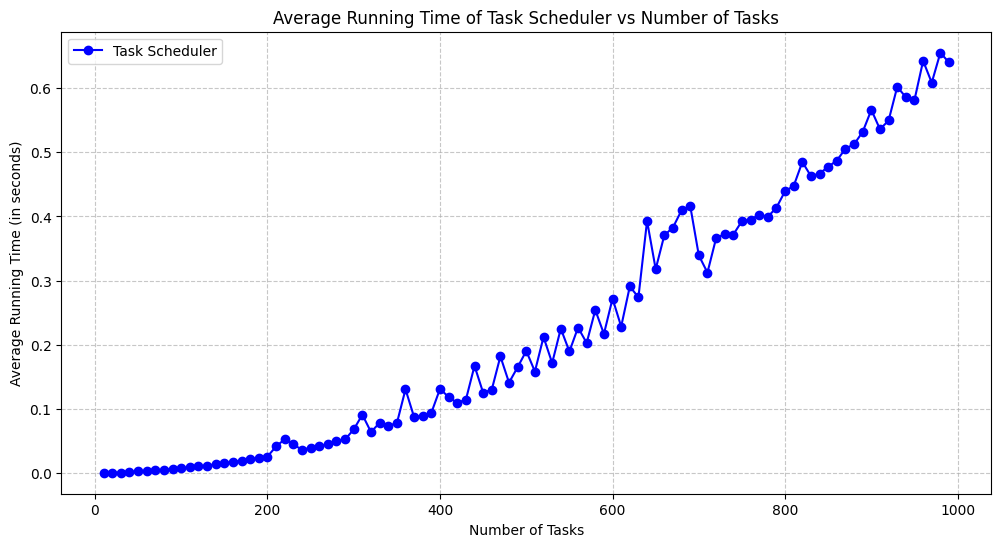

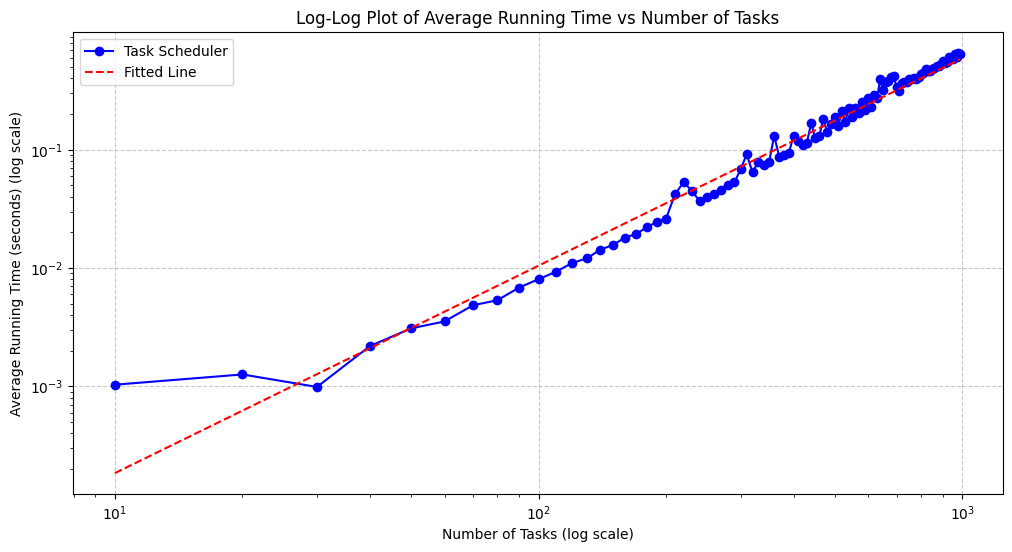

Slope of the fitted line: 1.7532
Intercept of the fitted line: -12.6337


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Parameters for the experiment
num_tasks_list = [x for x in range(10, 1000, 10)]  # Number of tasks to test

# Run experiments and collect results
results = run_experiments_avg_running_time(num_tasks_list)

# Calculate slopes between points
slopes = []
for i in range(1, len(results)):
    slope = (results[i] - results[i-1]) / (num_tasks_list[i] - num_tasks_list[i-1])
    slopes.append(slope)

# Prepare data for table display
table_data = list(zip(num_tasks_list[1:], results[1:], slopes))

# Create a figure for the main plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting results in linear scale
ax.plot(num_tasks_list, results, label='Task Scheduler', color='blue', marker='o')
ax.set_title('Average Running Time of Task Scheduler vs Number of Tasks')
ax.set_xlabel('Number of Tasks')
ax.set_ylabel('Average Running Time (in seconds)')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Create a log-log plot
plt.figure(figsize=(12, 6))
plt.loglog(num_tasks_list, results, label='Task Scheduler', color='blue', marker='o')

# Fit a line to the log-log data
X = np.log(np.array(num_tasks_list)).reshape(-1, 1)  # reshape for sklearn
y = np.log(np.array(results))

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the fitted line on the log-log plot
plt.loglog(num_tasks_list, np.exp(y_pred), color='red', linestyle='--', label='Fitted Line')

# Get the slope from the linear regression model (the coefficient)
slope = model.coef_[0]
intercept = model.intercept_

plt.title('Log-Log Plot of Average Running Time vs Number of Tasks')
plt.xlabel('Number of Tasks (log scale)')
plt.ylabel('Average Running Time (seconds) (log scale)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the slope of the fitted line
print(f"Slope of the fitted line: {slope:.4f}")
print(f"Intercept of the fitted line: {intercept:.4f}")

## Qualitative Analysis

Introducing the 12-hour constraint, and delayed tasks.

In [59]:
class Task:
    """
    Represents a task with its details and current status.

    Attributes:
        id (int): Unique identifier for the task.
        description (str): A brief description of the task.
        duration (int): Duration of the task in minutes.
        dependencies (list): List of task IDs that must be completed before this task.
        scheduled_time (int, optional): The specific time (in minutes from the start of the day)
                                         when the task is scheduled to start. Default is None.
        status (str): Current status of the task. Possible values:
                      - 'N' (NOT_STARTED): The task has not been started.
                      - 'I' (IN_PRIORITY_QUEUE): The task is in the priority queue.
                      - 'C' (COMPLETED): The task has been completed.
                      - 'D' (DELAYED): The task has been delayed.
        priority_score (int): A score representing the urgency or importance of the task.
                              Higher values indicate higher priority.
    """

    # Status constants for clarity and consistency
    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    DELAYED = 'D'

    def __init__(self, id, description, duration, dependencies, scheduled_time=None, status='N', priority_score=0):
        """
        Initializes a Task instance.

        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.scheduled_time = scheduled_time
        self.status = status
        self.priority_score = priority_score

    def __str__(self):
        """
        Returns a human-readable string representation of the Task.

        Returns:
            str: A string describing the task, including its ID, description,
                 duration, status, and priority score.
        """
        return (
            f"Task {self.id}: {self.description}\n"
            f"\tDuration: {self.duration} minutes\n"
            f"\tStatus: {self.status}\n"
            f"\tPriority Score = {self.priority_score}\n"
        )

    def compute_priority(self, current_time):
        """
        Computes and updates the task's priority score based on its attributes and the current time.

        Priority is calculated using the following factors:
        - Scheduled Time: Tasks closer to their scheduled time have higher priority.
        - Dependencies: Tasks with many dependencies have slightly reduced priority.
        - Duration: Shorter tasks may be prioritized for scheduling efficiency.

        Args:
            current_time (int): The current time (in minutes from the start of the day).
        """
        # Determine time priority based on the scheduled time of the task
        time_priority = 0 # Default
        if self.scheduled_time is not None:  # Check if the task has a predefined scheduled time
            if self.scheduled_time == current_time:
                time_priority = 100  # Assign maximum priority if the task is scheduled for the current time
            elif self.scheduled_time < current_time:
                time_priority = 0  # Task loses priority if its scheduled time has already passed
            else:
                # Increase priority as the task's scheduled time approaches the current time
                time_priority = (self.scheduled_time - current_time) * 10

        # Penalize tasks with many dependencies
        dependency_score = len(self.dependencies)

        # Total priority score calculation
        total_priority = (
            time_priority -  # Directly use time_priority, which can be positive
            dependency_score + # Dependence score contributes negatively to the utility
            abs(100 - self.duration)  # Longer tasks have lower scores
        )

        self.priority_score = total_priority

    def __lt__(self, other):
        """
        Compares tasks for sorting, based on their priority score.

        Args:
            other (Task): Another Task instance to compare with.

        Returns:
            bool: True if this task has a lower priority score than the other task.
        """
        return self.priority_score < other.priority_score

    def to_dict(self):
        """
        Converts the Task instance into a dictionary representation.

        Returns:
            dict: A dictionary containing the task's key attributes:
                  - id (int): Task ID.
                  - title (str): Task description.
                  - duration (int): Task duration in minutes.
                  - dependency (list): List of task dependencies.
        """
        return {
            "id": self.id,
            "title": self.description,
            "duration": self.duration,
            "dependency": self.dependencies,
        }

In [62]:
class TaskScheduler:
    """
    A simple daily task scheduler using a priority queue.

    Attributes:
        tasks (list): List of tasks to be managed by the scheduler.
        priority_queue (MaxHeapq): Priority queue for managing task execution order.
    """

    NOT_STARTED = 'N'  # Task has not been started
    IN_PRIORITY_QUEUE = 'I'  # Task is in the priority queue
    COMPLETED = 'C'  # Task has been completed
    DELAYED = 'D'  # Task has been delayed

    def __init__(self, tasks):
        """
        Initializes an instance of TaskScheduler.

        Args:
            tasks (list): List of Task instances to schedule.
        """
        self.tasks = tasks  # Store the list of tasks
        self.priority_queue = MaxHeapq()  # Initialize the priority queue
        self.executed_task_descriptions = []  # Stores descriptions of executed tasks

    def print_self(self):
        """Prints all tasks added to the scheduler with their details."""
        print("Tasks added to the simple scheduler:")
        print("--------------------------------------")

        for t in self.tasks:
            print(f"➡️ '{t.description}', duration = {t.duration} mins.")
            if len(t.dependencies) > 0:
                print(f"\t ⚠️ This task depends on others!")
                print(f"These are the dependencies: {t.dependencies}")

    def print_priority_queue(self):
        """Prints the current state of the priority queue."""
        print('This is my priority queue: ')

        for order, task in enumerate(self.priority_queue.heap):
            print(f'{order}) {task}')

    def remove_dependency(self, id):
        """
        Removes a specified task ID from the dependencies of other tasks.

        Args:
            id (int): The ID of the task whose dependencies should be removed.
        """
        for t in self.tasks:
            if t.id != id and id in t.dependencies:
                t.dependencies.remove(id)

    def get_tasks_ready(self, current_time):
        """
        Updates the status and computes priorities for tasks that are ready to execute.

        Args:
            current_time (int): The current time used to check readiness.
        """

        for task in self.tasks:
            # If the task has no dependencies and is not yet in the queue
            if task.status == self.NOT_STARTED and not task.dependencies:
                # Update status of the task
                task.status = self.IN_PRIORITY_QUEUE
                task.compute_priority(current_time)  # Compute priority based on current time
                # Push task into the priority queue
                self.priority_queue.heappush(task)

    def check_unscheduled_tasks(self):
        """Checks if there are any unscheduled tasks remaining."""

        for task in self.tasks:
            if task.status == self.NOT_STARTED:  # If any task is not started, return True
                return True

        return False  # No unscheduled tasks

    def format_time(self, time):
        """Formats time from minutes into hours and minutes string format."""

        return f"{time // 60}h{time % 60:02d}"

    def get_tasks_delayed(self):
       """
       Marks all tasks as delayed that are not completed or already in progress,
       and prints them out.

       This method is called when the day ends without completing all tasks.
       """

       # Change all relevant task statuses to delayed
       for task in self.tasks:
           if task.status == self.IN_PRIORITY_QUEUE or task.status == self.NOT_STARTED:
               task.status = self.DELAYED

       print('🌅 The day has ended! The following tasks have been delayed for tomorrow:\n')
       i = 1
       for task in self.tasks:
           if task.status == self.DELAYED:
               print(f'{i}) {task}')
               i += 1

    def validate_heap(self):
        """Validates that the priority queue maintains its max-heap property."""
        assert self.priority_queue.is_max_heap(), "Heap property violated!"

    def run_task_scheduler(self, starting_time):
        """
        Executes the scheduler starting from a specified time.

        Args:
            starting_time (int): The initial time from which scheduling begins.
        """
        day_ended = False  # Flag to indicate if the day has ended
        current_time = starting_time  # Initialize current time
        print("Running a simple scheduler:\n")

        while self.check_unscheduled_tasks() or self.priority_queue.heap:
            self.get_tasks_ready(current_time)  # Prepare tasks ready to execute
            #self.print_priority_queue() Uncommment to see the priority queue
            print("After adding tasks to the queue:")

            if self.priority_queue.heap_size > 0:  # If there are tasks in the queue
                current_task = self.priority_queue.heappop()  # Get highest priority task
                self.validate_heap()  # Validate heap property

                scheduled_time = current_task.scheduled_time

                if scheduled_time is not None and scheduled_time > current_time:
                    wait_until = scheduled_time

                    while current_time < wait_until:  # Wait until scheduled time
                        fill_in_executed = False

                        for current_index in range(self.priority_queue.heap_size):
                            peek_fill_in_task = self.priority_queue.heap[current_index]

                            if peek_fill_in_task.scheduled_time is None or peek_fill_in_task.scheduled_time < scheduled_time:
                                if current_time + peek_fill_in_task.duration <= wait_until:
                                    fill_in_task = self.priority_queue.anypop(current_index)
                                    self.validate_heap()

                                    print(f"🚀 Fill-in task available! t={self.format_time(current_time)}: started '{fill_in_task.description}' for {fill_in_task.duration} mins...")
                                    current_time += fill_in_task.duration  # Update current time after executing fill-in task
                                    print(f"\t✅ t={self.format_time(current_time)}, task completed!\n")
                                    self.remove_dependency(fill_in_task.id)  # Remove completed dependencies
                                    fill_in_task.status = fill_in_task.COMPLETED  # Mark as completed
                                    self.executed_task_descriptions.append(fill_in_task.description)  # Log description
                                    fill_in_executed = True
                                    break

                        if not fill_in_executed:  # If no fill-in tasks were executed, wait longer
                            print(f"💤 t={self.format_time(current_time)}: No eligible fill-in tasks available, waiting...\n")
                            current_time += 1

                print(f"🕰t={self.format_time(current_time)}: started '{current_task.description}' for {current_task.duration} mins...")
                current_time += current_task.duration  # Update time after executing main task
                print(f"\t✅ t={self.format_time(current_time)}, task completed!\n")
                self.remove_dependency(current_task.id)  # Remove completed dependencies
                current_task.status = current_task.COMPLETED  # Mark as completed
                self.executed_task_descriptions.append(current_task.description)  # Store description

                total_time_so_far = current_time - starting_time

                if total_time_so_far >= 12 * 60:  # End day after working for 12 hours
                    day_ended = True
                    break

        if day_ended:
            self.get_tasks_delayed()  # Handle any delayed tasks at end of day

        total_time = current_time - starting_time
        print(f"\n🏁 Completed all planned tasks in {total_time // 60}h{total_time % 60:02d}min!")

    def print_executed_task_descriptions(self):
        """
        Prints the final descriptions of executed tasks as a list of strings.
        """
        print("\nFinal descriptions of executed tasks:")
        print("-------------------------------------")
        for i, description in enumerate(self.executed_task_descriptions, start=1):
            print(f"{i}. {description}")

In [63]:
qualitative_test_tasks = [
    # Independent tasks
    Task(id=0, description='Get up and have breakfast', duration=30, dependencies=[]),
    Task(id=1, description='Daily Exercise', duration=45, dependencies=[]),

    # Pre-scheduled tasks
    Task(id=2, description='Meeting for AI Sustainability Lab', duration=75, dependencies=[0], scheduled_time=10*60),  # Scheduled at 12:00 PM
    Task(id=3, description='CS111 Class', duration=90, dependencies=[0, 4], scheduled_time=18*60),  # Scheduled at 6:00 PM

    # Dependent tasks
    Task(id=4, description='Do Pre-Class Work for CS111', duration=120, dependencies=[0]),  # Dependent on Breakfast and Meeting
    Task(id=5, description='Revise last CS113 Content', duration=70, dependencies=[0, 4]),  # No dependencies
    Task(id=6, description='Online Discussion with CCP Team', duration=60, dependencies=[0], scheduled_time=14*60),  # Scheduled at 2:00 PM

    # Time-consuming tasks
    Task(id=7, description='Skill Builder for CS113', duration=150, dependencies=[0, 5]),

    # Tasks with fixed deadlines
    Task(id=8, description='Bake Cookies with Friends', duration=120, dependencies=[0, 3, 4, 5], scheduled_time=20*60),  # Scheduled at 8:00 PM

    # Another dependent task
    Task(id=9, description='Planning for the Rest of the Week', duration=45, dependencies=[0, 8])
]

task_scheduler_qualitative_test = TaskScheduler(qualitative_test_tasks)

task_scheduler_qualitative_test.print_self()

start_scheduler_at = 9*60
task_scheduler_qualitative_test.run_task_scheduler(start_scheduler_at)
task_scheduler_qualitative_test.print_executed_task_descriptions()

Tasks added to the simple scheduler:
--------------------------------------
➡️ 'Get up and have breakfast', duration = 30 mins.
➡️ 'Daily Exercise', duration = 45 mins.
➡️ 'Meeting for AI Sustainability Lab', duration = 75 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0]
➡️ 'CS111 Class', duration = 90 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0, 4]
➡️ 'Do Pre-Class Work for CS111', duration = 120 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0]
➡️ 'Revise last CS113 Content', duration = 70 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0, 4]
➡️ 'Online Discussion with CCP Team', duration = 60 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0]
➡️ 'Skill Builder for CS113', duration = 150 mins.
	 ⚠️ This task depends on others!
These are the dependencies: [0, 5]
➡️ 'Bake Cookies with Friends', duration = 120 mins.
	 ⚠️ This task depends on others!
These are the dependencie